<a href="https://colab.research.google.com/github/MandarM10/Multiple-Disease-Prediction-System-using-Machine-Learning-in-Python-/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies



In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
RANDOM_STATE = 42
TEST_SIZE = 0.2

Data collectio and analysis


PIMA Diabetes Dataset

In [29]:
# Load the diabetes dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nDataset Shape: {diabetes_dataset.shape}")
print(f"Number of samples: {diabetes_dataset.shape[0]}")
print(f"Number of features: {diabetes_dataset.shape[1]}")

DATASET OVERVIEW

Dataset Shape: (768, 9)
Number of samples: 768
Number of features: 9


In [30]:
# First few rows
print("\nFirst 5 rows:")
print(diabetes_dataset.head())


First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [31]:
print("\n" + "="*60)
print("DATA QUALITY CHECKS")
print("="*60)

# Check for missing values
print(f"\nMissing values:\n{diabetes_dataset.isnull().sum()}")

# Check for duplicate rows
print(f"\nDuplicate rows: {diabetes_dataset.duplicated().sum()}")

# Check for zero values in columns where they shouldn't exist
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nZero value analysis (potential missing data):")
for col in zero_cols:
    zero_count = (diabetes_dataset[col] == 0).sum()
    zero_percent = (zero_count / len(diabetes_dataset)) * 100
    print(f"{col}: {zero_count} zeros ({zero_percent:.2f}%)")


DATA QUALITY CHECKS

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Duplicate rows: 0

Zero value analysis (potential missing data):
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)


In [32]:
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Statistical summary
print("\nStatistical Summary:")
print(diabetes_dataset.describe())

# Target variable distribution
print("\nTarget Variable Distribution (Outcome):")
print(diabetes_dataset['Outcome'].value_counts())
print(f"\nClass balance:")
print(diabetes_dataset['Outcome'].value_counts(normalize=True) * 100)

# Group statistics by outcome
print("\nMean values grouped by Outcome:")
print(diabetes_dataset.groupby('Outcome').mean())


EXPLORATORY DATA ANALYSIS

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232 

In [33]:
print("\n" + "="*60)
print("DATA PREPARATION")
print("="*60)

# Separate features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {Y.shape}")

# Display feature names
print(f"\nFeature columns: {list(X.columns)}")


DATA PREPARATION

Features shape: (768, 8)
Target shape: (768,)

Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [34]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaler.fit(X)
standardized_data = scaler.transform(X)

print("\nData standardization completed")
print(f"Standardized data shape: {standardized_data.shape}")

# Show sample of standardized data
print("\nSample of standardized data (first 5 rows):")
print(standardized_data[:5])

# Update X to use standardized data
X = standardized_data


Data standardization completed
Standardized data shape: (768, 8)

Sample of standardized data (first 5 rows):
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [35]:
print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=TEST_SIZE,
    stratify=Y,
    random_state=RANDOM_STATE
)

print(f"\nOriginal dataset: {X.shape}")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

print(f"\nTraining set class distribution:")
print(Y_train.value_counts())
print(f"\nTest set class distribution:")
print(Y_test.value_counts())


TRAIN-TEST SPLIT

Original dataset: (768, 8)
Training set: (614, 8)
Test set: (154, 8)

Training set class distribution:
Outcome
0    400
1    214
Name: count, dtype: int64

Test set class distribution:
Outcome
0    100
1     54
Name: count, dtype: int64


In [36]:
print("\n" + "="*60)
print("MODEL TRAINING")
print("="*60)

# Initialize SVM classifier
classifier = SVC(kernel='linear', random_state=RANDOM_STATE)

# Train the model
print("\nTraining Support Vector Machine classifier...")
classifier.fit(X_train, Y_train)
print("Training completed!")


MODEL TRAINING

Training Support Vector Machine classifier...
Training completed!


In [37]:
print("\n" + "="*60)
print("TRAINING SET EVALUATION")
print("="*60)

# Predictions on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print(f"\nTraining Accuracy: {training_data_accuracy:.4f} ({training_data_accuracy*100:.2f}%)")

print("\nTraining Set Classification Report:")
print(classification_report(Y_train, X_train_prediction,
                          target_names=['Non-Diabetic', 'Diabetic']))

print("Training Set Confusion Matrix:")
print(confusion_matrix(Y_train, X_train_prediction))


TRAINING SET EVALUATION

Training Accuracy: 0.7915 (79.15%)

Training Set Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.90      0.85       400
    Diabetic       0.76      0.59      0.66       214

    accuracy                           0.79       614
   macro avg       0.78      0.74      0.76       614
weighted avg       0.79      0.79      0.78       614

Training Set Confusion Matrix:
[[360  40]
 [ 88 126]]


In [38]:
print("\n" + "="*60)
print("TEST SET EVALUATION")
print("="*60)

# Predictions on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print(f"\nTest Accuracy: {test_data_accuracy:.4f} ({test_data_accuracy*100:.2f}%)")

print("\nTest Set Classification Report:")
print(classification_report(Y_test, X_test_prediction,
                          target_names=['Non-Diabetic', 'Diabetic']))

print("Test Set Confusion Matrix:")
cm = confusion_matrix(Y_test, X_test_prediction)
print(cm)

# Breakdown of confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")


TEST SET EVALUATION

Test Accuracy: 0.7208 (72.08%)

Test Set Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.76      0.83      0.79       100
    Diabetic       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154

Test Set Confusion Matrix:
[[83 17]
 [26 28]]

True Negatives: 83
False Positives: 17
False Negatives: 26
True Positives: 28


In [39]:
print("\n" + "="*60)
print("CROSS-VALIDATION")
print("="*60)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X_train, Y_train, cv=5, scoring='accuracy')

print(f"\n5-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
print(f"Min CV Accuracy: {cv_scores.min():.4f}")
print(f"Max CV Accuracy: {cv_scores.max():.4f}")


CROSS-VALIDATION

5-Fold Cross-Validation Scores: [0.75609756 0.78861789 0.75609756 0.77235772 0.80327869]
Mean CV Accuracy: 0.7753 (+/- 0.0185)
Min CV Accuracy: 0.7561
Max CV Accuracy: 0.8033


In [40]:
print("\n" + "="*60)
print("ROC-AUC SCORE")
print("="*60)

# Get decision function scores (distance from hyperplane)
X_test_scores = classifier.decision_function(X_test)

# Calculate ROC-AUC
roc_auc = roc_auc_score(Y_test, X_test_scores)
print(f"\nROC-AUC Score: {roc_auc:.4f}")


ROC-AUC SCORE

ROC-AUC Score: 0.8274


In [41]:
print("\n" + "="*60)
print("FINAL MODEL SUMMARY")
print("="*60)

print(f"""
Model: Support Vector Machine (Linear Kernel)
Dataset: PIMA Diabetes Dataset
Total Samples: {len(diabetes_dataset)}
Training Samples: {len(X_train)}
Test Samples: {len(X_test)}

PERFORMANCE METRICS:
-------------------
Training Accuracy: {training_data_accuracy:.4f} ({training_data_accuracy*100:.2f}%)
Test Accuracy: {test_data_accuracy:.4f} ({test_data_accuracy*100:.2f}%)
Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})
ROC-AUC Score: {roc_auc:.4f}

Model is {'overfitting' if training_data_accuracy - test_data_accuracy > 0.05 else 'well-generalized'}
""")


FINAL MODEL SUMMARY

Model: Support Vector Machine (Linear Kernel)
Dataset: PIMA Diabetes Dataset
Total Samples: 768
Training Samples: 614
Test Samples: 154

PERFORMANCE METRICS:
-------------------
Training Accuracy: 0.7915 (79.15%)
Test Accuracy: 0.7208 (72.08%)
Cross-Validation Accuracy: 0.7753 (+/- 0.0185)
ROC-AUC Score: 0.8274

Model is overfitting



In [52]:
print("\n" + "="*60)
print("PREDICTION SYSTEM - DEMO")
print("="*60)

def predict_diabetes(input_data):
    """
    Predict diabetes for given input

    Parameters:
    -----------
    input_data : tuple
        (Pregnancies, Glucose, BloodPressure, SkinThickness,
         Insulin, BMI, DiabetesPedigreeFunction, Age)

    Returns:
    --------
    prediction : str
        'Diabetic' or 'Non-Diabetic'
    confidence : float
        Confidence score
    """
    # Convert to numpy array and reshape
    input_array = np.asarray(input_data).reshape(1, -1)

    # Standardize the input
    input_standardized = scaler.transform(input_array)

    # Make prediction
    prediction = classifier.predict(input_standardized)[0]

    # Get confidence (decision function score)
    confidence_score = classifier.decision_function(input_standardized)[0]

    # Interpret result
    result = 'Diabetic' if prediction == 1 else 'Non-Diabetic'

    return result, abs(confidence_score)

# Test with sample data
print("\nTesting prediction system with sample data:")
print("-" * 60)

# Sample 1
sample_input_1 = (0,137,40,35,168,43.1,2.288,33)
result_1, confidence_1 = predict_diabetes(sample_input_1)

print(f"\nSample 1 Input: {sample_input_1}")
print(f"Prediction: {result_1}")
print(f"Confidence Score: {confidence_1:.4f}")

# Sample 2
sample_input_2 = (5,116,74,0,0,25.6,0.201,30)
result_2, confidence_2 = predict_diabetes(sample_input_2)

print(f"\nSample 2 Input: {sample_input_2}")
print(f"Prediction: {result_2}")
print(f"Confidence Score: {confidence_2:.4f}")

# Sample 3
sample_input_3 = (11,143,94,33,146,36.6,0.254,51)
result_3, confidence_3 = predict_diabetes(sample_input_3)


#Sample 4
sample_input_4 = (4,146,85,27,100,28.9,0.189,27)
result_4, confidence_4 = predict_diabetes(sample_input_4)


print(f"\nSample 4 Input: {sample_input_4}")
print(f"Prediction: {result_4}")
print(f"Confidence Score: {confidence_4:.4f}")

print("\n" + "="*60)
print("PREDICTION SYSTEM STILL NOT READY FOR DEPLOYMENT")
print("="*60)


PREDICTION SYSTEM - DEMO

Testing prediction system with sample data:
------------------------------------------------------------

Sample 1 Input: (0, 137, 40, 35, 168, 43.1, 2.288, 33)
Prediction: Diabetic
Confidence Score: 1.5202

Sample 2 Input: (5, 116, 74, 0, 0, 25.6, 0.201, 30)
Prediction: Non-Diabetic
Confidence Score: 1.3988

Sample 4 Input: (4, 146, 85, 27, 100, 28.9, 0.189, 27)
Prediction: Non-Diabetic
Confidence Score: 0.5651

PREDICTION SYSTEM READY FOR DEPLOYMENT


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


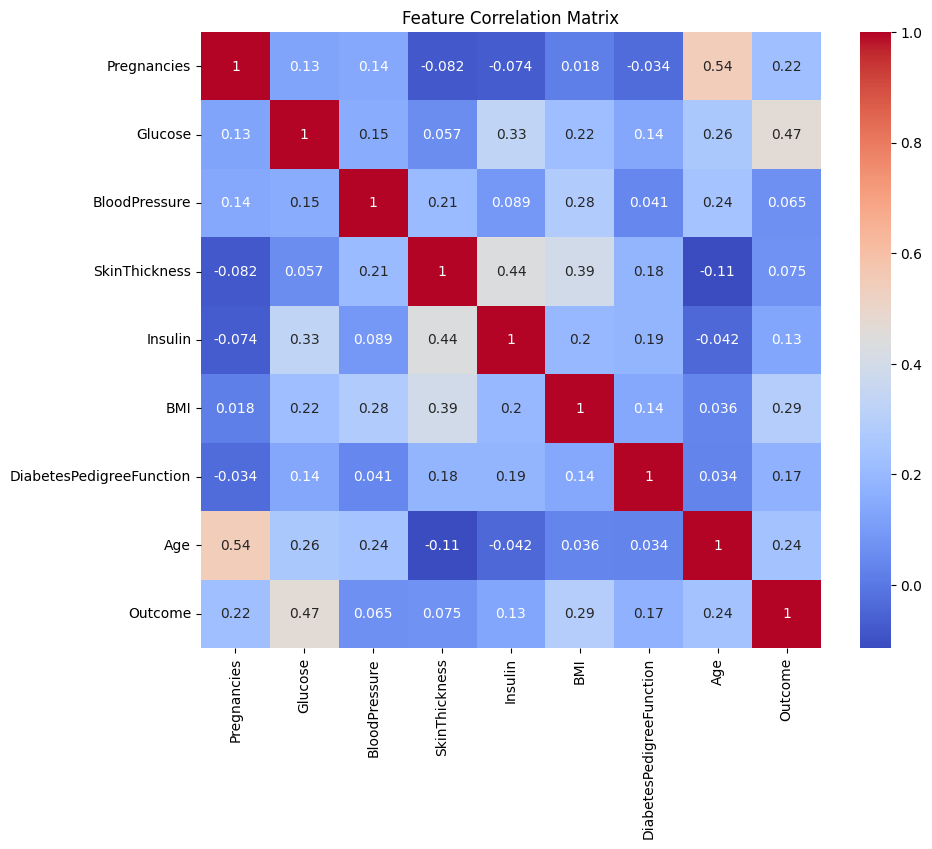

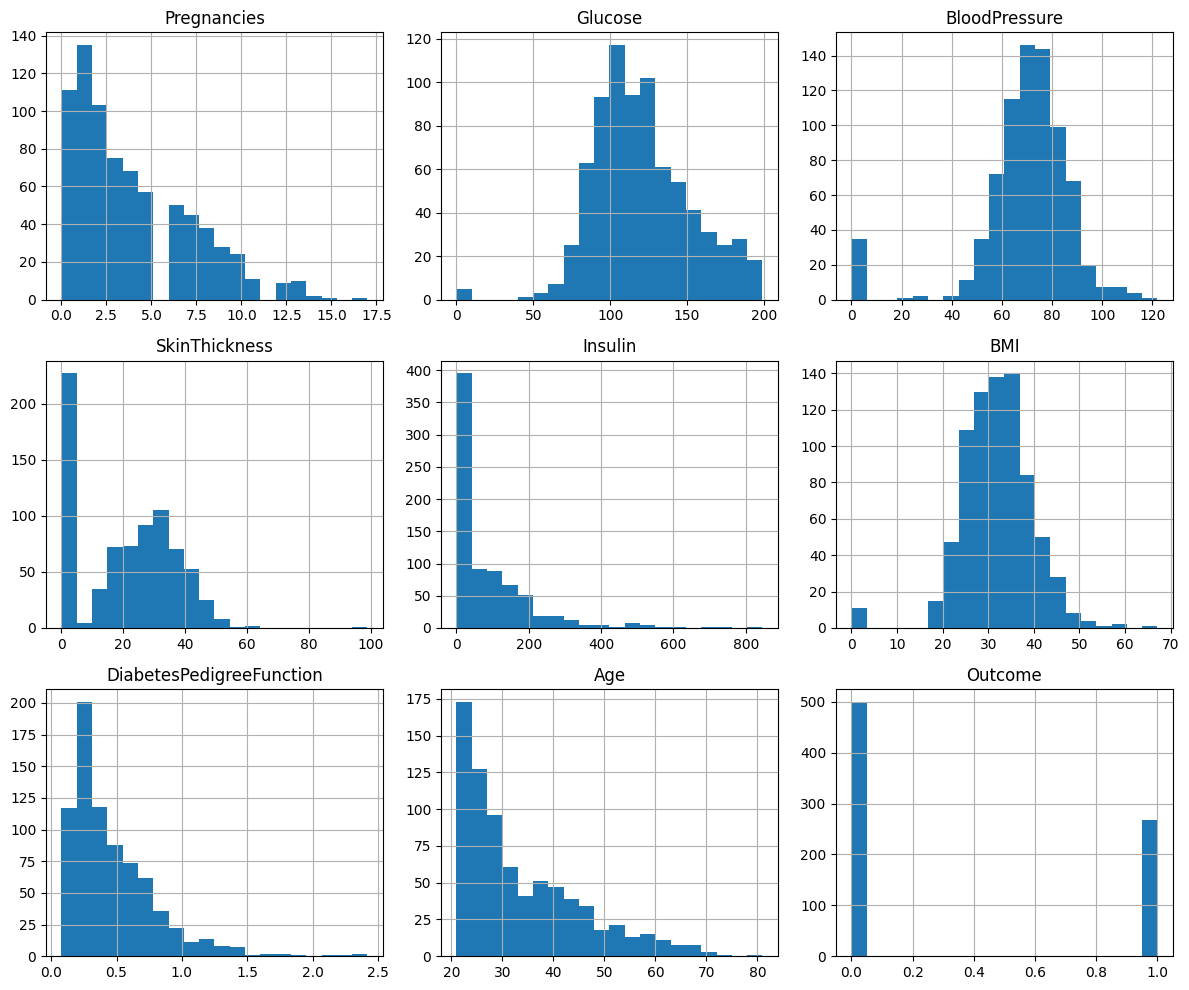

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')

# Feature distributions
diabetes_dataset.hist(figsize=(12, 10), bins=20)
plt.tight_layout()